In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import json,urllib.request
import csv 
import pandas as pd
import requests
import geopandas as gpd
import geojson
import tweepy
import datetime
from fastai.text import *
import pydeck as pdk
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

C:\Softwares\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
airpol_dat = pd.read_csv('covidDat.csv')
airpol_dat.describe()

,Unnamed: 0,pm252013me,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop,total_registered_patients,hypertension,obesity_18,diabetes,asthma,coronary_heart_disease,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop
count,983.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.00000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,492.000000,15.938071,5.030494,0.561978,9046.881178,0.086992,10174.479495,10.020852,5.726320,4.735636,4.18164,1.801546,0.393035,0.130459,0.053277,0.063420
std,283.911958,0.716993,3.561507,0.386205,1926.286896,0.035260,2234.820761,2.049052,1.621238,1.335349,0.66057,0.520971,0.193107,0.103965,0.080483,0.084448
min,1.000000,14.444532,0.000000,0.000000,5427.000000,0.016901,5887.000000,4.100000,1.730000,1.610000,1.80000,0.600000,0.038123,0.007140,0.001467,0.003494
25%,246.500000,15.410490,3.000000,0.301773,7781.000000,0.060295,8639.000000,8.500000,4.610000,3.845000,3.78000,1.395000,0.235230,0.049005,0.012185,0.017794
50%,492.000000,15.827902,4.000000,0.488878,8753.000000,0.079617,9841.000000,9.980000,5.600000,4.690000,4.19000,1.720000,0.372515,0.099303,0.024733,0.031121
75%,737.500000,16.351284,7.000000,0.735479,9995.500000,0.106673,11311.000000,11.465000,6.740000,5.490000,4.60000,2.200000,0.534579,0.189579,0.052345,0.064754
max,983.000000,19.028207,28.000000,2.827037,24969.000000,0.222585,24142.000000,15.980000,10.690000,10.650000,6.12000,3.310000,0.938644,0.545031,0.534751,0.492892


### Clustering 

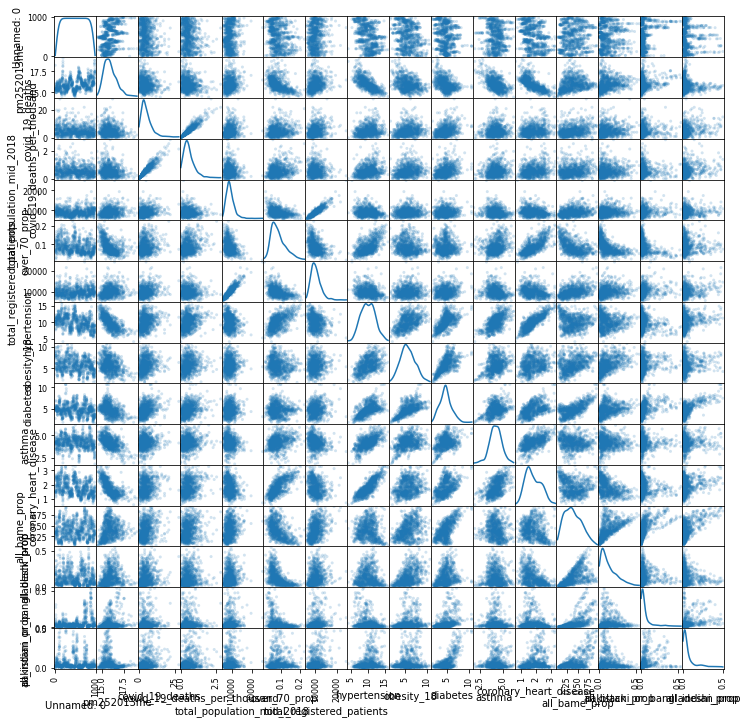

In [4]:
output = pd.plotting.scatter_matrix(airpol_dat, alpha=0.2, figsize=(12, 12), diagonal='kde')

In [5]:
airpol_dat.corr()

,Unnamed: 0,pm252013me,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop,total_registered_patients,hypertension,obesity_18,diabetes,asthma,coronary_heart_disease,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop
Unnamed: 0,1.000000,0.311912,-0.141083,-0.152621,0.052503,-0.267986,0.075818,-0.400991,-0.227482,-0.160968,-0.086063,-0.352120,0.071820,-0.003798,0.298971,-0.118541
pm252013me,0.311912,1.000000,-0.118205,-0.170669,0.173358,-0.499567,0.206173,-0.716283,-0.310178,-0.399414,-0.552809,-0.700780,0.182988,0.176399,0.188798,-0.222907
covid_19_deaths,-0.141083,-0.118205,1.000000,0.945218,0.193969,0.122389,0.237129,0.205804,0.175079,0.326099,0.072426,0.187968,0.235034,0.119374,0.046280,0.248902
covid_19_deaths_per_thousand,-0.152621,-0.170669,0.945218,1.000000,-0.072201,0.231468,-0.017485,0.254232,0.160092,0.302644,0.114989,0.246070,0.163749,0.072014,0.001609,0.223603
total_population_mid_2018,0.052503,0.173358,0.193969,-0.072201,1.000000,-0.356800,0.918831,-0.187762,0.064915,0.058522,-0.152835,-0.208728,0.233406,0.142732,0.151436,0.087975
over_70_prop,-0.267986,-0.499567,0.122389,0.231468,-0.356800,1.000000,-0.421739,0.586222,-0.165008,-0.015596,0.289030,0.727012,-0.528428,-0.553397,-0.346950,0.046538
total_registered_patients,0.075818,0.206173,0.237129,-0.017485,0.918831,-0.421739,1.000000,-0.228395,0.074590,0.153172,-0.184434,-0.255903,0.392573,0.205511,0.207402,0.243287
hypertension,-0.400991,-0.716283,0.205804,0.254232,-0.187762,0.586222,-0.228395,1.000000,0.467258,0.583212,0.614783,0.844275,-0.085371,-0.069850,-0.217428,0.232838
obesity_18,-0.227482,-0.310178,0.175079,0.160092,0.064915,-0.165008,0.074590,0.467258,1.000000,0.656290,0.326287,0.216039,0.374719,0.469647,0.147820,0.135872
diabetes,-0.160968,-0.399414,0.326099,0.302644,0.058522,-0.015596,0.153172,0.583212,0.656290,1.000000,0.357575,0.462497,0.650766,0.241026,0.387381,0.658891


In [6]:
from sklearn.cluster import DBSCAN

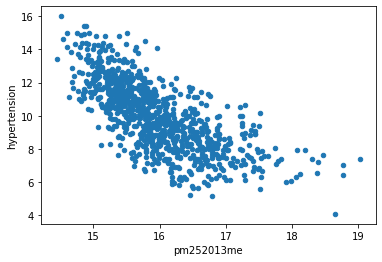

In [7]:
airpol_dat.plot.scatter(x='pm252013me', y='hypertension')

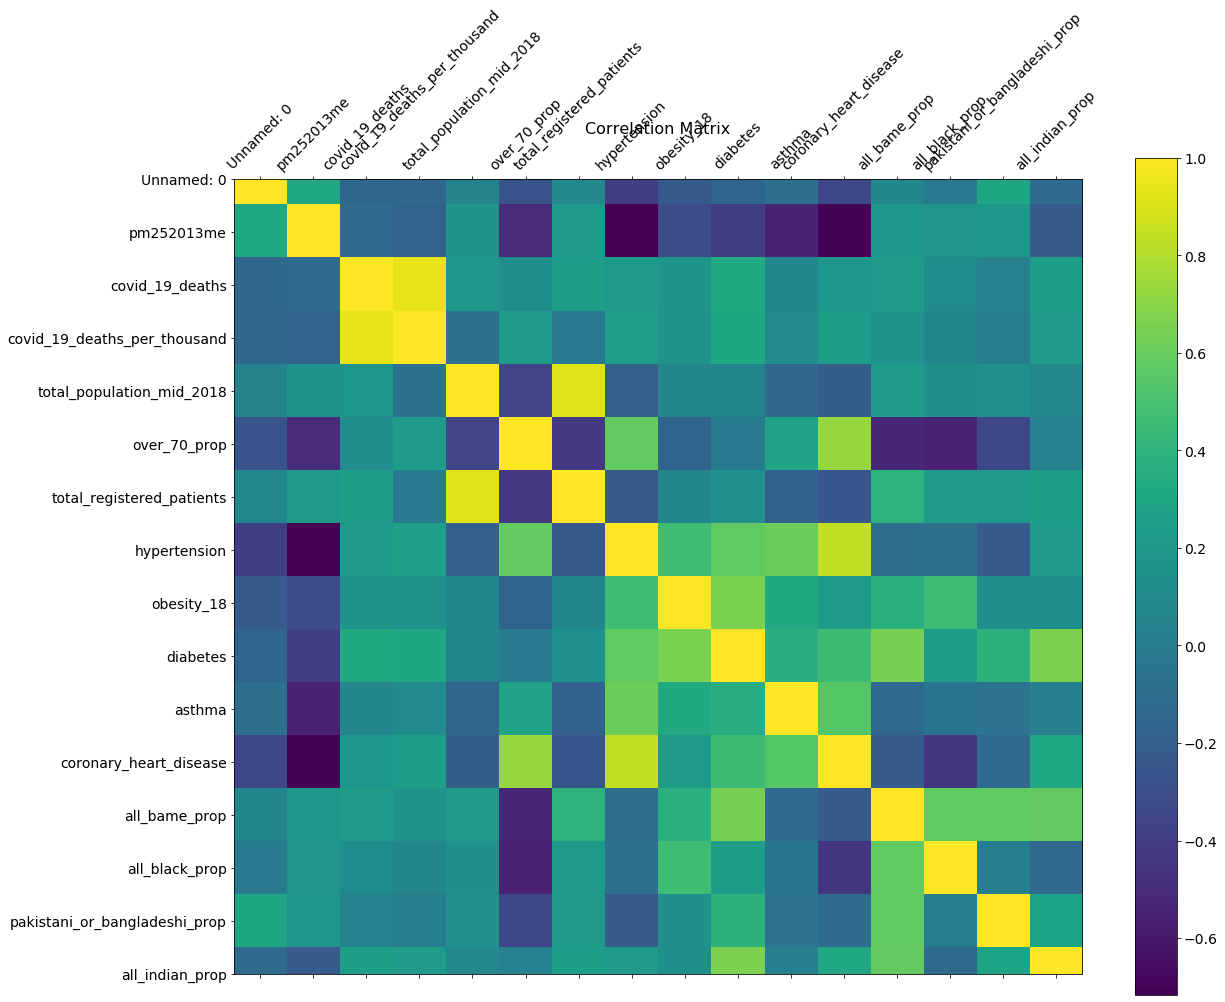

In [30]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(airpol_dat.corr(), fignum=f.number)
plt.xticks(range(airpol_dat.shape[1]), airpol_dat.columns, fontsize=14, rotation=45)
plt.yticks(range(airpol_dat.shape[1]), airpol_dat.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

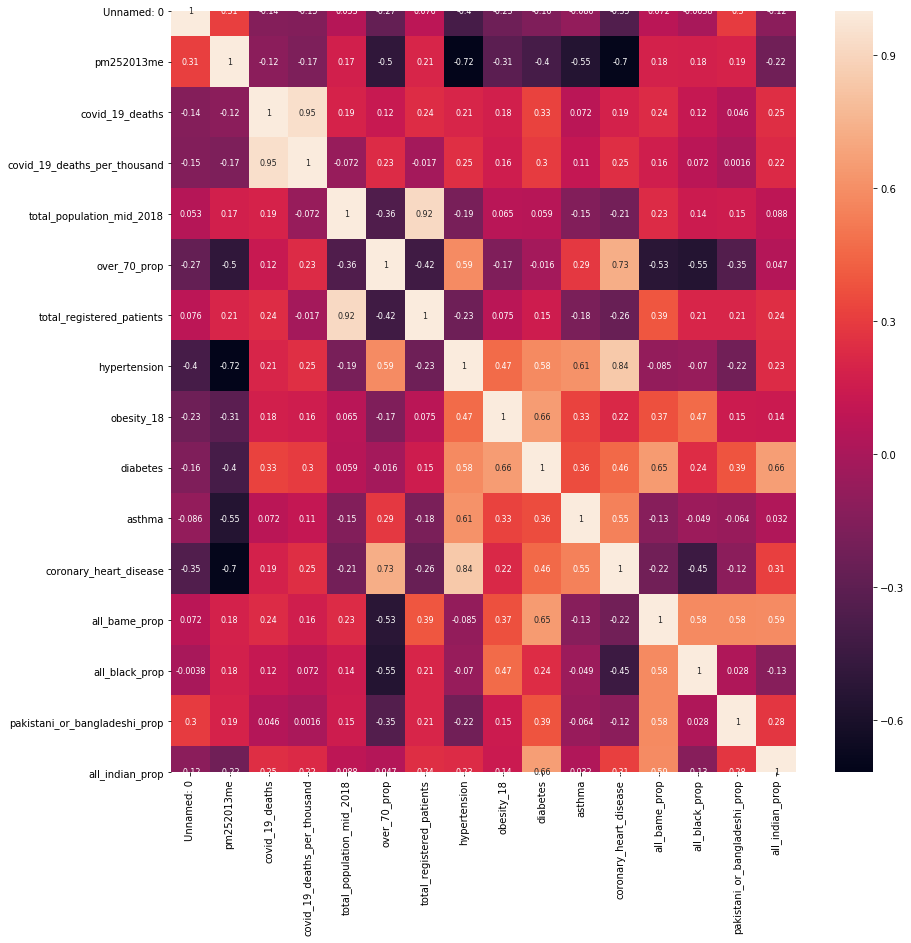

In [3]:
corrMatrix = airpol_dat.corr()
plt.figure(figsize = (14,14))
sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 8})

In [24]:
# This code comes from the module of Quantitative Methods (CASA0007), and is prepared by Dr Thomas Evans

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
#             print(worst_feature)            
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(included[worst_feature], worst_pval))
            included.remove(included[worst_feature])
        if not changed:
            break
    return included

In [93]:
airpol_dat = airpol_dat.dropna()

In [77]:
# split the DataFrame into predictors and response

predictors_airpol_dat = airpol_dat.drop(columns=['Unnamed: 0','pm252013me'], axis=1)
response_airpol_dat = airpol_dat[['pm252013me']]

In [78]:
response_airpol_dat.dtypes

pm252013me    float64
dtype: object

In [79]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_airpol_dat, y=response_airpol_dat)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

C:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Add  hypertension                   with p-value 1.83695e-150
Add  coronary_heart_disease         with p-value 8.95443e-16
Add  asthma                         with p-value 1.39774e-09
Add  pakistani_or_bangladeshi_prop  with p-value 0.00132267
Add  all_indian_prop                with p-value 0.00155615
Add  all_bame_prop                  with p-value 1.97213e-07
Drop pakistani_or_bangladeshi_prop  with p-value 0.974587
Add  all_black_prop                 with p-value 1.18525e-14
Add  pakistani_or_bangladeshi_prop  with p-value 3.54616e-15
Add  diabetes                       with p-value 0.00608906
Drop hypertension                   with p-value 0.0806155
The predictors that are selected by stepwise regression are:
['coronary_heart_disease', 'asthma', 'all_indian_prop', 'all_bame_prop', 'all_black_prop', 'pakistani_or_bangladeshi_prop', 'diabetes']


In [ ]:
airpol_dat = pd.read_csv('covidDat.csv')
airpol_dat

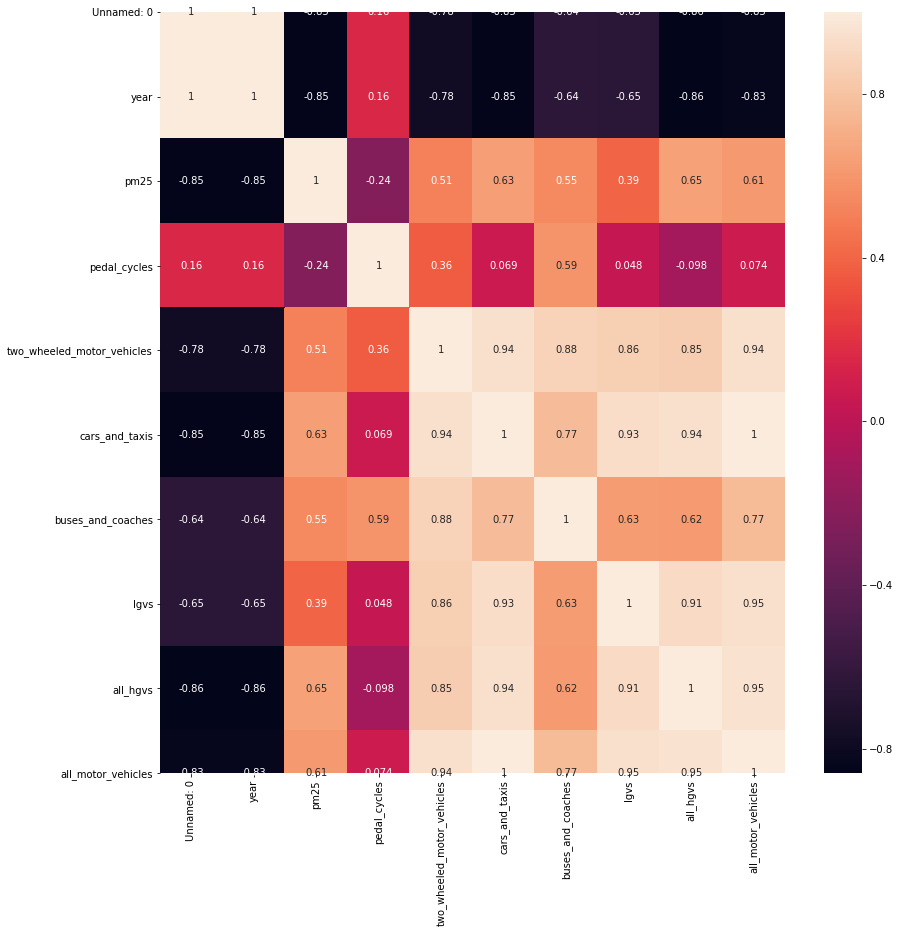

In [32]:
Mast_dat = pd.read_csv('MasterData.csv')
Mast_dat
corrMatrix = Mast_dat.corr()
plt.figure(figsize = (14,14))
sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 10})

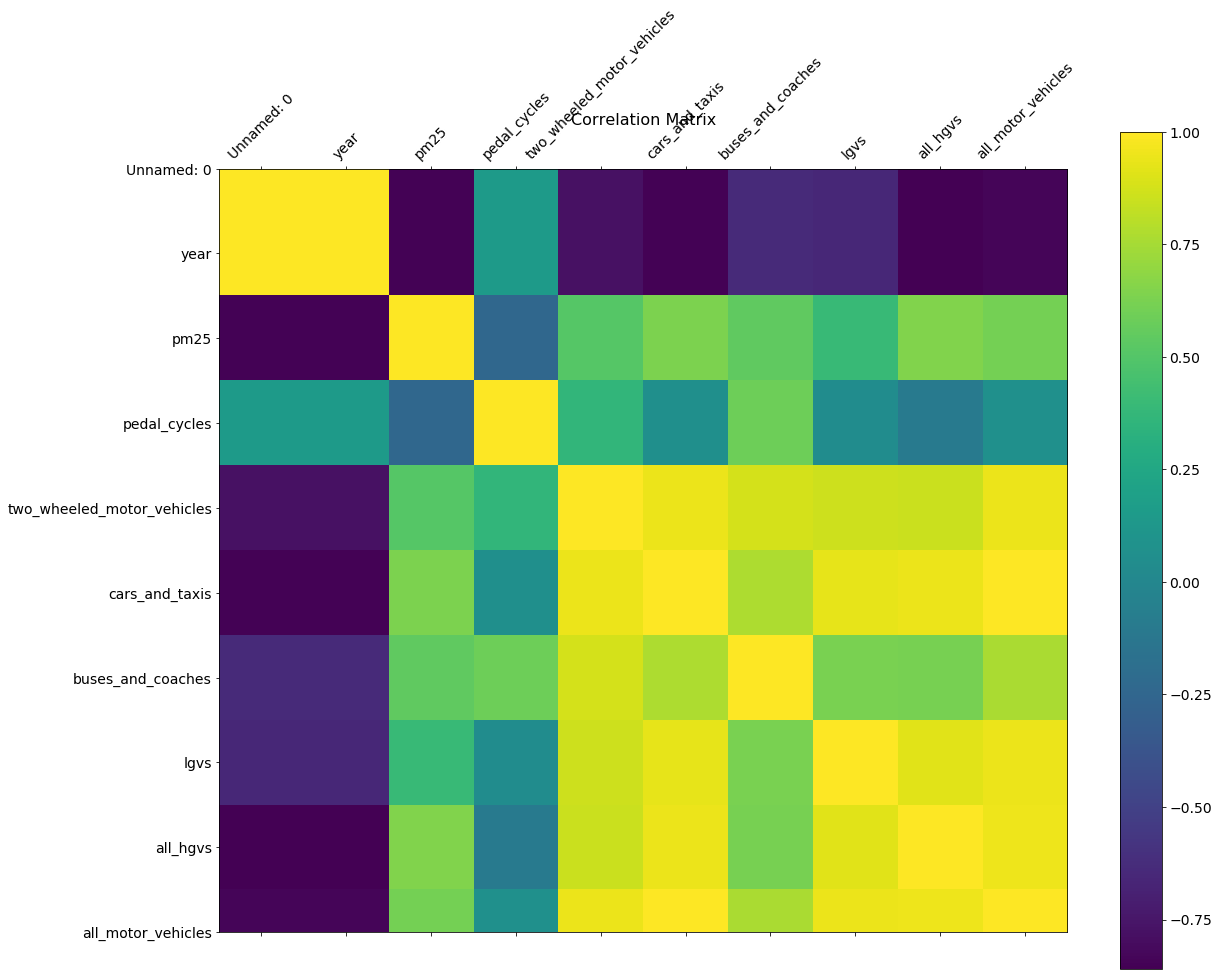

In [94]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(Mast_dat.corr(), fignum=f.number)
plt.xticks(range(Mast_dat.shape[1]), Mast_dat.columns, fontsize=14, rotation=45)
plt.yticks(range(Mast_dat.shape[1]), Mast_dat.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [100]:
# split the DataFrame into predictors and response
Mast_dat = Mast_dat.astype(float)
predictors_Mast_dat = Mast_dat.drop(columns=['Unnamed: 0','pm25','year'], axis=1)
response_Mast_dat = Mast_dat[['pm25']]

In [101]:
predictors_Mast_dat
#.dtypes

,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
0,316682.0,466341.0,11738459.0,337438.0,2263064.0,895591.0,15700893.0
1,195905.0,320732.0,9176552.0,250081.0,1826327.0,759186.0,12332878.0
2,273124.0,371210.0,10020397.0,304683.0,2135690.0,856027.0,13688007.0
3,297107.0,379155.0,9826911.0,295153.0,2165897.0,758294.0,13425410.0
4,178031.0,277638.0,7620383.0,165590.0,1822818.0,648449.0,10534878.0
5,258156.0,349619.0,9357783.0,224812.0,2225005.0,816731.0,12973950.0
6,245973.0,238718.0,5988912.0,190814.0,1490707.0,373912.0,8283063.0
7,235663.0,273043.0,7883679.0,218053.0,1870305.0,480642.0,10725722.0
8,358876.0,271445.0,5806282.0,240600.0,1460269.0,338965.0,8117561.0


In [105]:
list_predictor = stepwise_selection(X=predictors_Mast_dat, y=response_Mast_dat)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor)

C:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Add  pm25                           with p-value 8.25395e-103
The predictors that are selected by stepwise regression are:
['pm25']


In [21]:
# calculating VIF
# This function is from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print('Features above VIF threshold:\n')
    print(vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df

In [108]:
# using VIF on the bike_rental dataset
df_predictors_select_VIF = calculate_vif_(Mast_dat)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

C:\Softwares\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Softwares\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning:

divide by zero encountered in double_scalars



Features above VIF threshold:

                                     VIF
two_wheeled_motor_vehicles           inf
cars_and_taxis                       inf
buses_and_coaches                    inf
lgvs                                 inf
all_hgvs                             inf
all_motor_vehicles                   inf
year                        7.644233e+11
Unnamed: 0                  7.227732e+11
pedal_cycles                9.418668e+02
pm25                        1.917364e+01
Dropping: two_wheeled_motor_vehicles
Dropping: cars_and_taxis
Dropping: buses_and_coaches
Dropping: lgvs
Dropping: all_hgvs
Dropping: all_motor_vehicles
Dropping: year
Dropping: Unnamed: 0
Dropping: pedal_cycles
Dropping: pm25
The columns remaining after VIF selection are:
Index([], dtype='object')


## PCA

In [110]:
# separate the independent and dependent variables

X = predictors_airpol_dat.values
y = response_airpol_dat.values

# the name list of independent variables
list_var_X = predictors_airpol_dat.columns.tolist()
# list_var_X.remove('MEDV')


In [111]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_coordinates = pca.fit_transform(X)

In [112]:
print(list_var_X)

['covid_19_deaths', 'covid_19_deaths_per_thousand', 'total_population_mid_2018', 'over_70_prop', 'total_registered_patients', 'hypertension', 'obesity_18', 'diabetes', 'asthma', 'coronary_heart_disease', 'all_bame_prop', 'all_black_prop', 'pakistani_or_bangladeshi_prop', 'all_indian_prop']


In [113]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop,total_registered_patients,hypertension,obesity_18,diabetes,asthma,coronary_heart_disease,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop
0,-0.196465,-0.246062,0.171276,-0.351032,0.173889,-0.460295,-0.195455,-0.304349,-0.327295,-0.461532,0.040447,0.123533,0.062343,-0.185575
1,0.228985,0.157119,0.256393,-0.277847,0.319241,0.009133,0.282255,0.369802,-0.013216,-0.072942,0.465865,0.290210,0.279018,0.277353
2,0.517705,0.451271,0.290209,0.189585,0.288635,-0.129510,-0.344556,-0.179304,-0.218061,0.022998,-0.128874,-0.269819,-0.101602,0.096998
3,-0.333742,-0.403242,0.228560,0.102444,0.235797,0.001824,-0.217703,0.119413,-0.019488,0.225932,0.038430,-0.494567,0.291326,0.404538
4,-0.065045,-0.212671,0.534709,-0.006247,0.426423,0.232315,0.224413,-0.059911,0.279795,0.094613,-0.253525,0.126096,-0.359595,-0.279481
5,0.133569,0.121585,0.075040,-0.105994,-0.026694,-0.135050,0.042234,-0.069653,0.461357,0.008074,-0.154668,-0.213938,0.671532,-0.437450
6,-0.007728,-0.026243,0.097742,0.197843,-0.038959,0.113765,0.481952,0.054208,-0.707639,0.145335,-0.143254,-0.108272,0.252468,-0.288132
7,-0.049550,-0.093845,0.089331,0.451627,0.048035,0.240135,-0.503890,-0.001190,-0.069693,0.101951,0.275996,0.479954,0.250908,-0.279601
8,-0.071425,-0.005930,-0.023206,0.675558,0.118499,-0.313959,0.382946,-0.228876,0.208917,-0.346946,0.066980,0.069655,0.061033,0.221860
9,0.011558,-0.004168,-0.044442,0.089209,0.058403,0.385667,-0.138963,0.451031,-0.022410,-0.718245,-0.264488,-0.160215,0.041353,-0.036270


In [131]:
print(pca.explained_variance_ratio_)
print(pca)

[0.274589 0.265841 0.1231   0.106088 0.095673 0.051268 0.034098 0.021843 0.010937 0.00529  0.004336 0.003845 0.001812
 0.001279]
PCA(copy=True, iterated_power='auto', n_components=None, random_state=10,
    svd_solver='auto', tol=0.0, whiten=False)


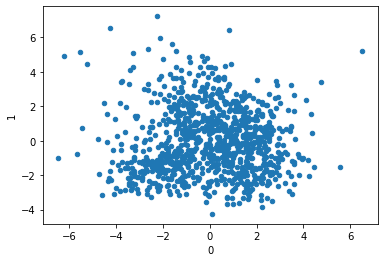

In [118]:
df_X_new_coord = pd.DataFrame(X_new_coordinates)
# print(df_X_new_coord.shape)
# print(df_X_new_coord.columns.tolist())
df_X_new_coord.plot.scatter(x = 0, y = 1)
# df_X_new_coord

In [121]:
X_three_pc = X_new_coordinates[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [123]:
split_rand_state = 1
train_X_pc, test_X_pc, train_y_pc, test_y_pc = train_test_split(X_three_pc, y, random_state=split_rand_state)

In [125]:
# train a new model
lr_pc = LinearRegression()
lr_pc.fit(X=train_X_pc, y=train_y_pc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
# measure the model performance
lr_pc.score(X=test_X_pc, y=test_y_pc)

0.6363751234243082

In [132]:
regressor_OLS = sm.OLS(endog=train_y_pc, exog=sm.add_constant(train_X_pc)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     87.91
Date:                Thu, 13 Aug 2020   Prob (F-statistic):          1.60e-143
Time:                        08:40:58   Log-Likelihood:                -407.18
No. Observations:                 713   AIC:                             844.4
Df Residuals:                     698   BIC:                             912.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9463      0.016    982.120      0.000      15.914      15.978
x1             0.2584      0.008     31.321      0.000       0.242       0.275
x2             0.0293      0.008      3.520      0.000       0.013       0.046
x3             0.0591      0.012      4.793      0.000       0.035       0.083
x4            -0.0523      0.013     -3.948      0.000      -0.078      -0.026
x5            -0.1262      0.014     -8.915      0.000      -0.154      -0.098
x6             0.0299      0.020      1.520      0.129      -0.009       0.069
x7             0.0337      0.024      1.420      0.156      -0.013       0.080
x8             0.0440      0.029      1.507      0.132      -0.013       0.101
x9             0.0296      0.041      0.714      0.475      -0.052       0.111
x10            0.0483      0.062      0.785      0.433      -0.073       0.169
x11           -0.0868      0.065     -1.341      0.180      -0.214       0.040
x12           -0.0593      0.071     -0.838      0.402      -0.198       0.080
x13            1.0755      0.104     10.325      0.000       0.871       1.280
x14            0.2703      0.119      2.266      0.024       0.036       0.505
==============================================================================
Omnibus:                       98.261   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.015
Skew:                           0.849   Prob(JB):                     9.91e-39
Kurtosis:                       4.735   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
from sklearn.model_selection import train_test_split
split_rand_state = 1
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=split_rand_state)

In [129]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=train_X, y=train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(X=test_X, y=test_y)

   ## 2016 emissions data

In [2]:
PM252016_dat = pd.read_csv('2016_EmissioNS_PM215_T.csv')
PM252016_dat

,Source,Wood Burning,Gas Combustion,Oil/Coal Combustion,Household and Garden NRMM,Construction / Demolition Dust,NRMM Exhaust,Cooking,Gas Leakage,Gas Combustion.1,...,Motorcycle,Non-TfL Bus and Coach,Taxi,TfL Bus,Domestic,Industrial and Commercial,Miscellaneous,Resuspension.1,Transport,LAEI (Grand Total)
0,Barking.and.Dagenham,20.838703,2.843047,2.297172,0.023005,9.259987,13.098051,3.932762,0,0.691708,...,0.139159,0.305899,0.364374,1.364975,26.001926,48.578391,2.187341,0.928622,26.781761,104.478041
1,Barnet,28.939930,8.413604,2.226054,0.073436,18.304462,25.891265,12.034601,0,1.357391,...,0.498268,1.307137,2.203679,3.306512,39.653024,72.966003,2.854134,2.199133,70.946879,188.619173
2,Bexley,27.527271,4.752825,2.718339,0.045305,10.420257,14.739227,6.970103,0,0.800169,...,0.243566,0.700065,0.532355,1.703107,35.043740,68.653259,2.758467,1.102179,36.100436,143.658081
3,Brent,19.977017,5.950456,1.593287,0.025577,6.313223,8.929917,10.671760,0,1.356926,...,0.287694,0.615410,1.641642,2.595594,27.546336,44.172240,3.046184,1.205819,41.812351,117.782930
4,Bromley,33.212044,7.858801,3.018082,0.126920,13.241110,18.729263,10.984617,0,0.953285,...,0.363824,0.832477,0.685246,2.514181,44.215846,59.510919,5.335442,1.324599,49.936000,160.322807
5,Camden,4.813491,3.669979,0.606223,0.007645,3.745891,5.298481,42.197254,0,3.714520,...,0.425559,0.547065,3.841725,2.554031,9.097339,60.313497,1.675365,0.807878,29.237873,101.131952
6,City,0.013227,0.051272,0.002362,0.000015,1.229561,1.739187,24.268965,0,1.954774,...,0.224622,0.381163,2.968451,1.073831,0.066876,32.669808,0.348869,0.306337,11.813479,45.205369
7,City.of.Westminster,4.386812,3.678568,0.632400,0.001948,8.010010,11.329985,95.955871,0,6.301241,...,0.776362,1.945467,12.448214,4.594264,8.699728,140.991704,2.830398,1.360210,49.596791,203.478831
8,Croydon,34.344686,7.885972,3.696239,0.086655,8.340345,11.797237,10.681531,0,1.199677,...,0.322859,0.828699,0.649370,2.860478,46.013552,43.068722,3.235155,1.311671,45.055498,138.684598
9,Ealing,26.868059,6.402114,2.524937,0.024631,8.910272,12.603387,11.050723,0,1.768258,...,0.436414,1.009891,1.447253,3.036582,35.819741,53.563073,4.238252,1.664536,66.378422,161.664023


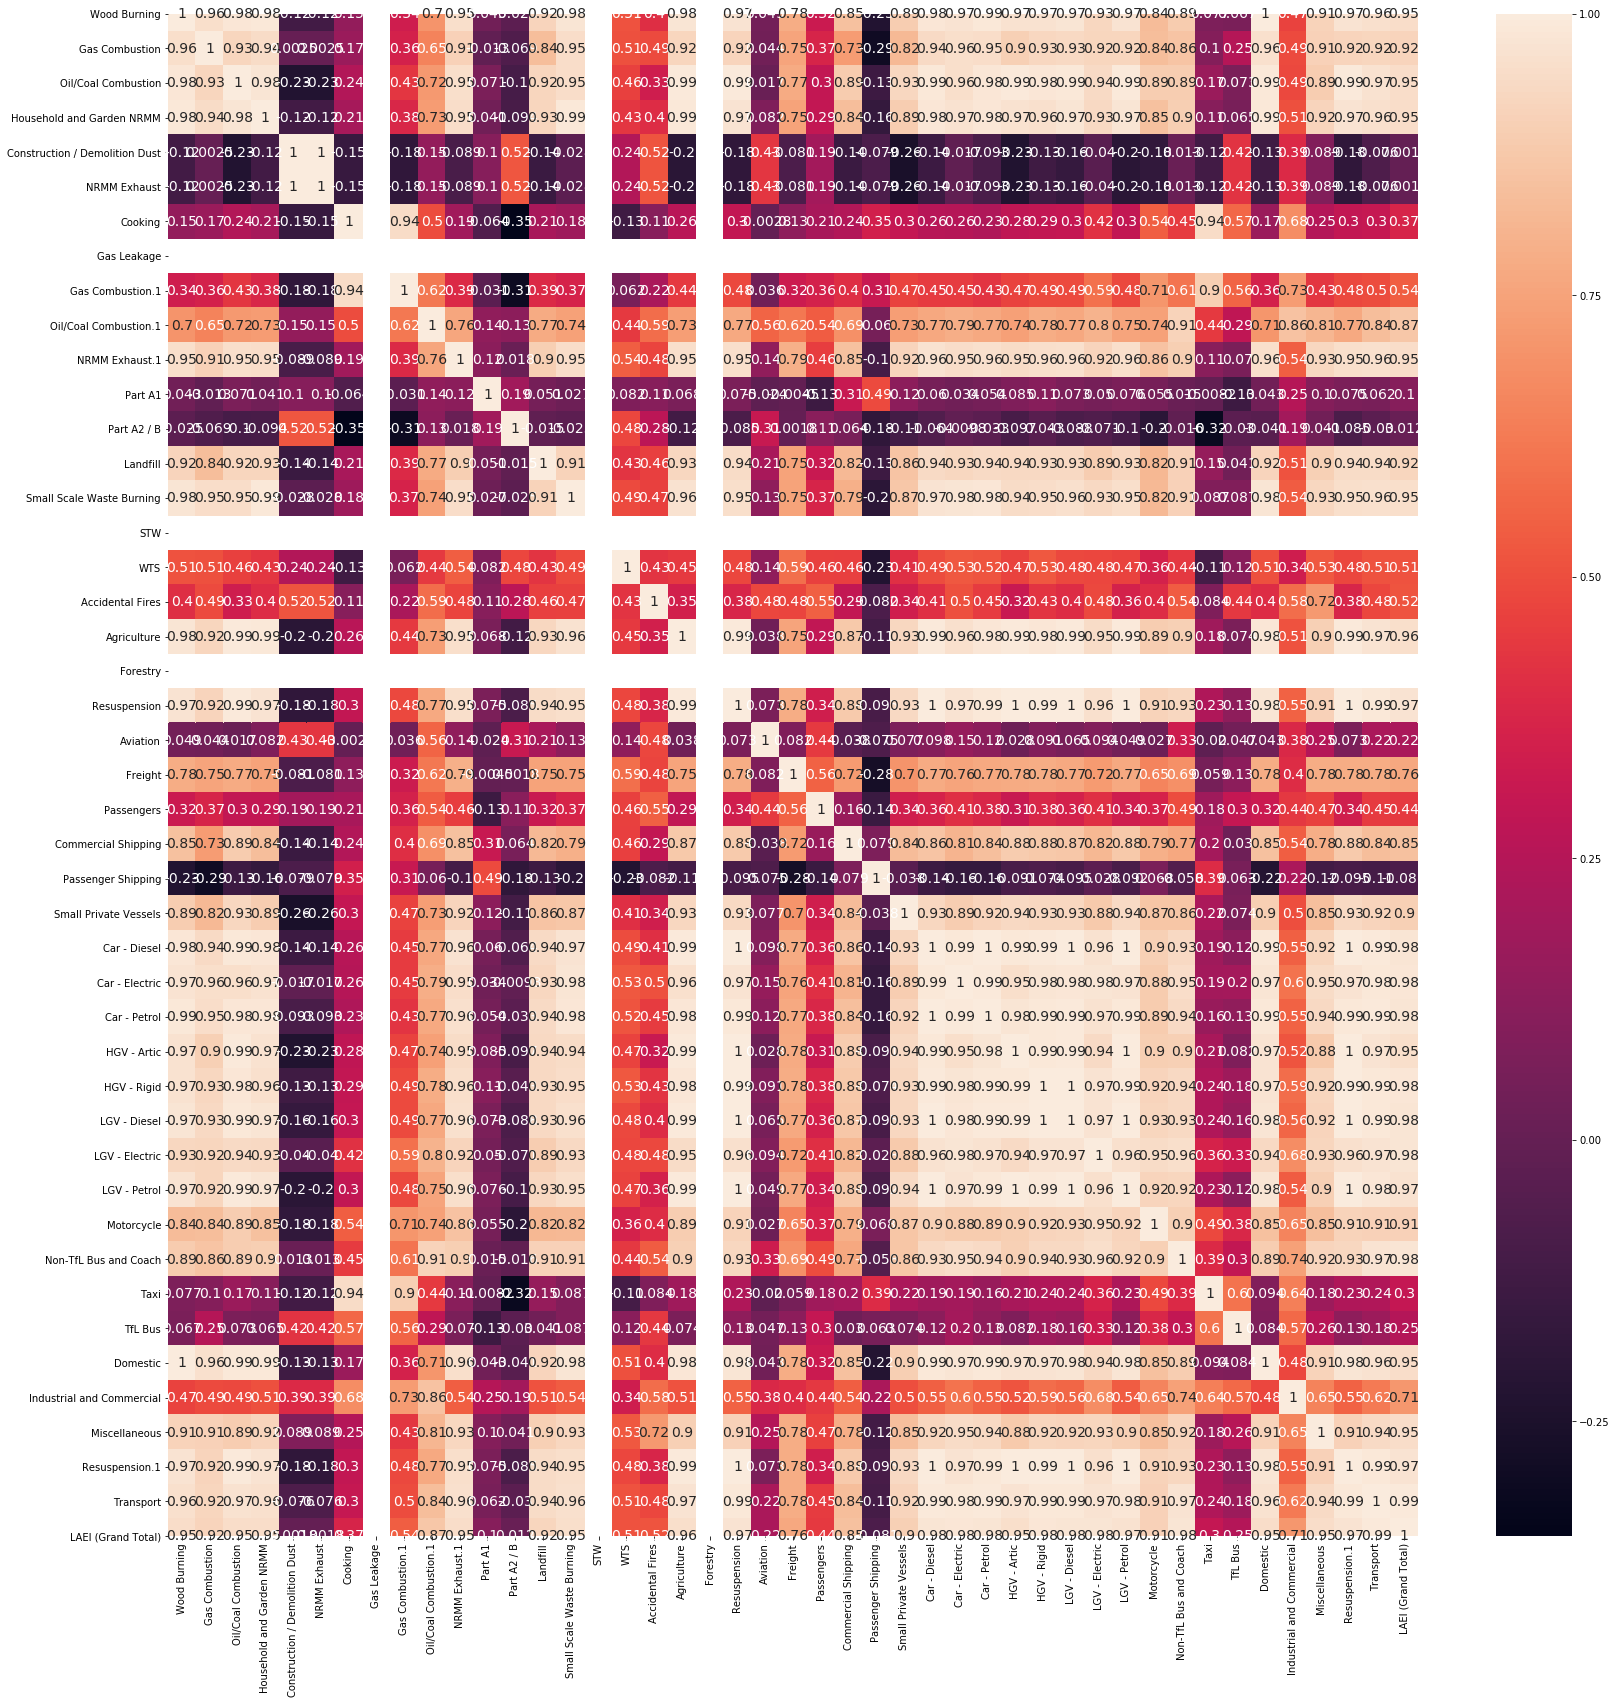

In [10]:
corrMatrix = PM252016_dat.corr()
plt.figure(figsize = (28,28))
sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 14})

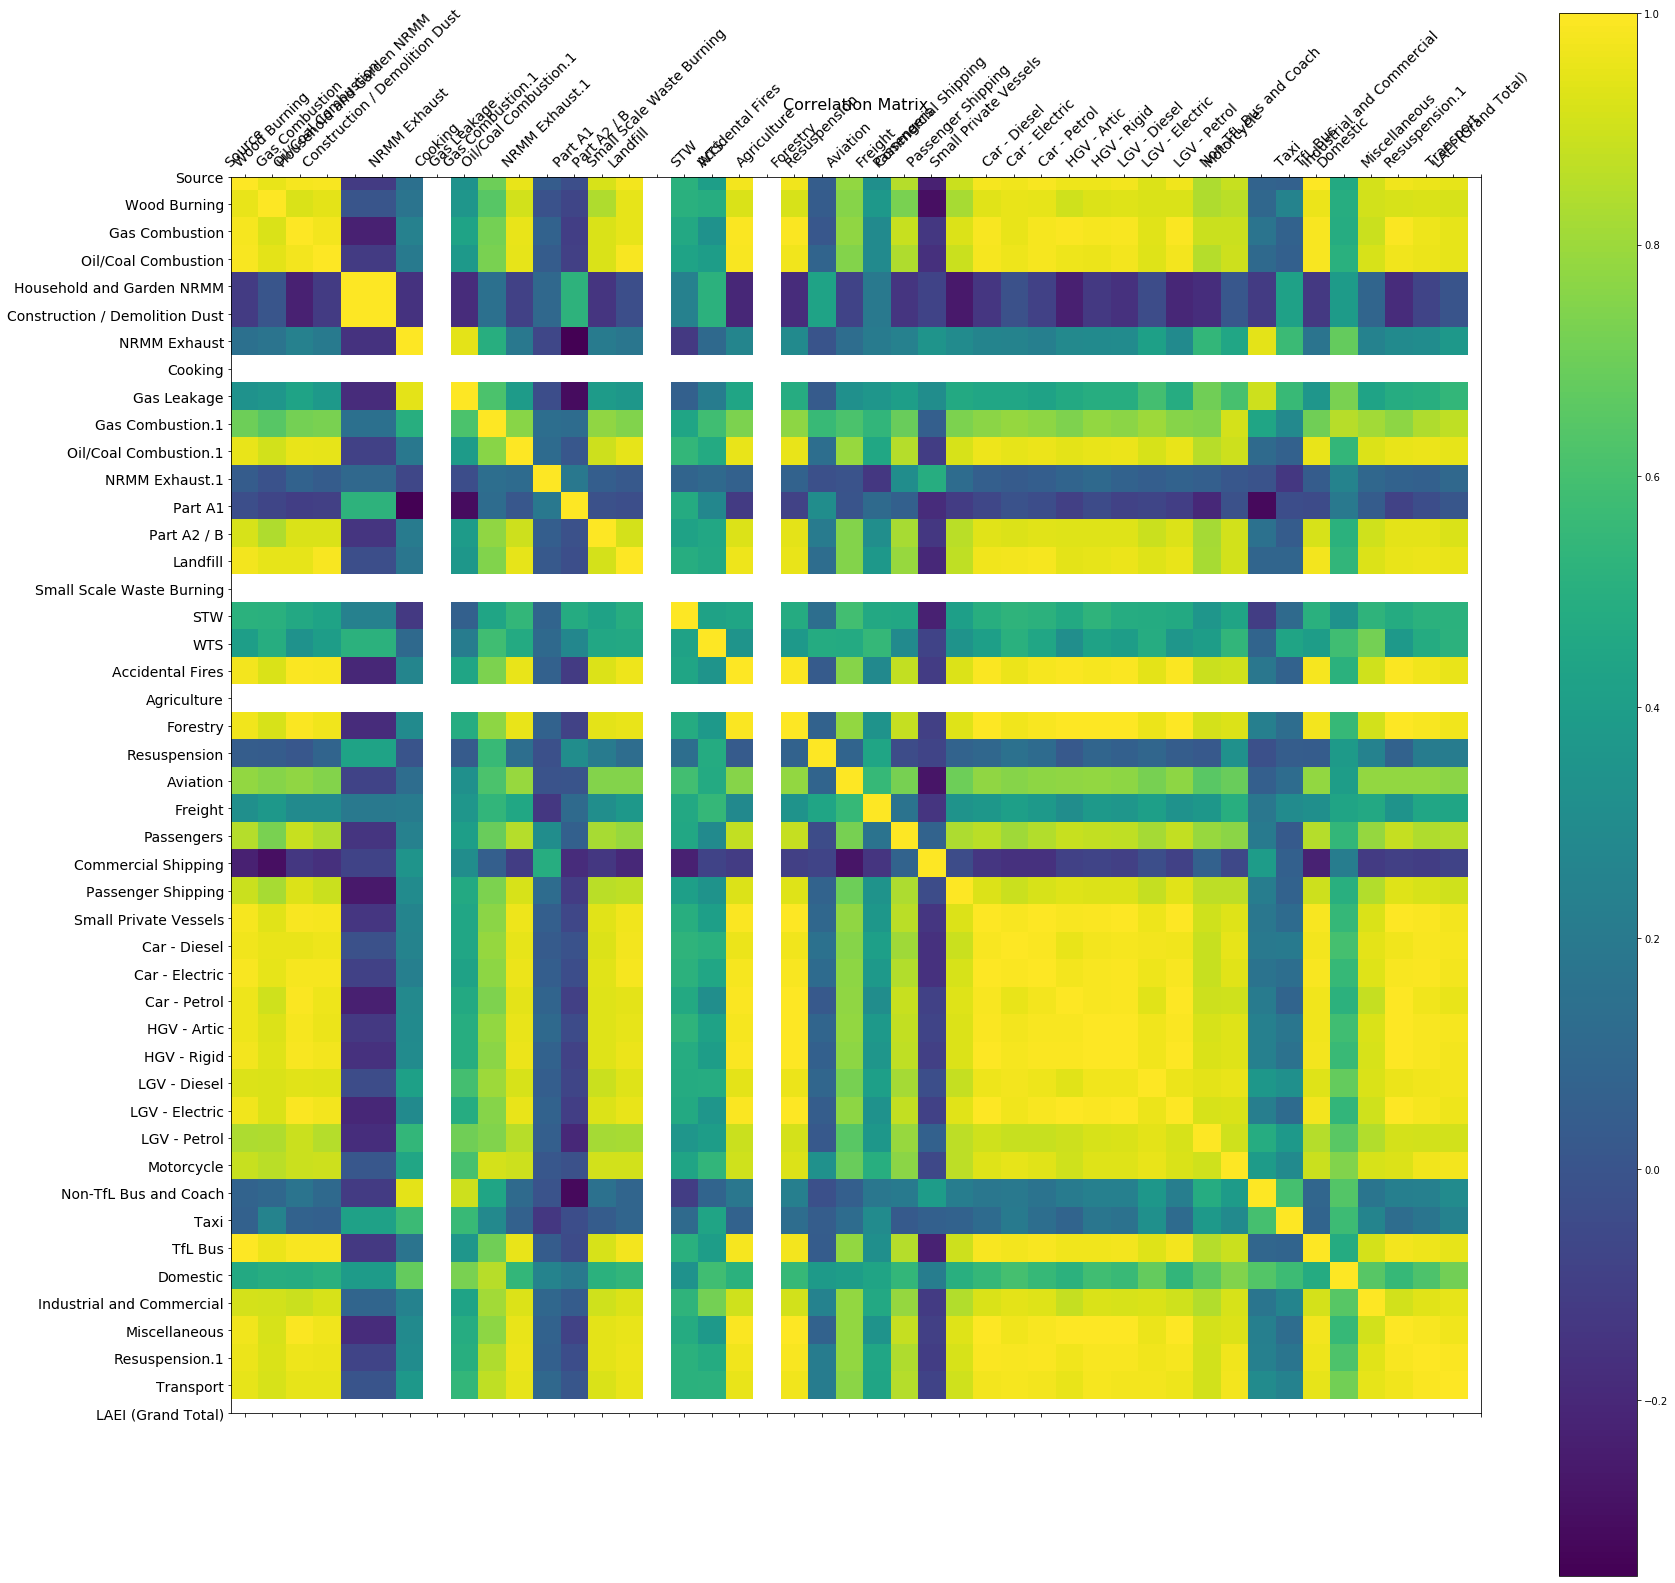

In [11]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(28, 28))
plt.matshow(PM152016_dat.corr(), fignum=f.number)
plt.xticks(range(PM252016_dat.shape[1]), PM152016_dat.columns, fontsize=14, rotation=45)
plt.yticks(range(PM252016_dat.shape[1]), PM152016_dat.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16);

In [13]:
corr = PM252016_dat.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

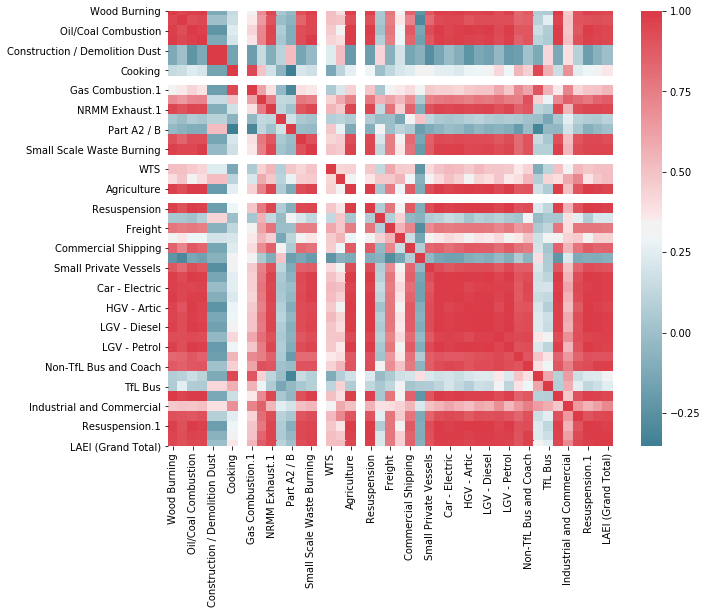

In [17]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = PM252016_dat.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

C:\Softwares\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning:

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.

C:\Softwares\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning:

Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.

C:\Softwares\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning:

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5425C3548>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E5426DB088>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E5430C2E08>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E543AACBC8>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E5444999C8>, ...,
       ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E564D4EF48>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E566711908>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E5670FD248>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E567AE6C08>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E568405FC8>]], dtype=object)

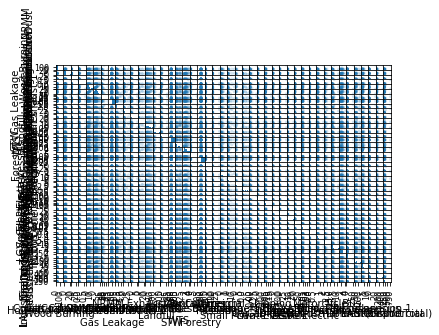

In [3]:
pd.plotting.scatter_matrix(PM252016_dat, alpha=0.2,  diagonal='hist')
#figsize=(6, 6),

In [16]:
# separate the independent and dependent variables
predictors_PM252016_dat = PM252016_dat.drop(columns=['Source','LAEI (Grand Total)'], axis=1)
response_PM252016_dat = PM252016_dat[['LAEI (Grand Total)']]

X = predictors_PM252016_dat.values
y = response_PM252016_dat.values

# the name list of independent variables
list_var_X = predictors_PM252016_dat.columns.tolist()
# list_var_X.remove('MEDV')


In [17]:
PM252016_dat.dtypes

Source                             object
Wood Burning                      float64
Gas Combustion                    float64
Oil/Coal Combustion               float64
Household and Garden NRMM         float64
Construction / Demolition Dust    float64
NRMM Exhaust                      float64
Cooking                           float64
Gas Leakage                         int64
Gas Combustion.1                  float64
Oil/Coal Combustion.1             float64
NRMM Exhaust.1                    float64
Part A1                           float64
Part A2 / B                       float64
Landfill                          float64
Small Scale Waste Burning         float64
STW                                 int64
WTS                               float64
Accidental Fires                  float64
Agriculture                       float64
Forestry                            int64
Resuspension                      float64
Aviation                          float64
Freight                           

In [18]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_coordinates = pca.fit_transform(X)
print(list_var_X)
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp
print(pca.explained_variance_ratio_)
print(pca)

['Wood Burning', 'Gas Combustion', 'Oil/Coal Combustion', 'Household and Garden NRMM', 'Construction / Demolition Dust', 'NRMM Exhaust', 'Cooking', 'Gas Leakage', 'Gas Combustion.1', 'Oil/Coal Combustion.1', 'NRMM Exhaust.1', 'Part A1', 'Part A2 / B', 'Landfill', 'Small Scale Waste Burning', 'STW', 'WTS', 'Accidental Fires', 'Agriculture', 'Forestry', 'Resuspension', 'Aviation', 'Freight', 'Passengers', 'Commercial Shipping', 'Passenger Shipping', 'Small Private Vessels', 'Car - Diesel', 'Car - Electric', 'Car - Petrol', 'HGV - Artic', 'HGV - Rigid', 'LGV - Diesel', 'LGV - Electric', 'LGV - Petrol', 'Motorcycle', 'Non-TfL Bus and Coach', 'Taxi', 'TfL Bus', 'Domestic', 'Industrial and Commercial', 'Miscellaneous', 'Resuspension.1', 'Transport']
[6.406768e-01 1.024260e-01 9.530961e-02 4.277937e-02 2.893857e-02 2.351156e-02 1.794185e-02 9.763173e-03 8.464090e-03
 7.094655e-03 5.803208e-03 5.169698e-03 3.246796e-03 2.233052e-03 1.760950e-03 1.568520e-03 8.693311e-04 7.955144e-04
 5.822228e

In [19]:
print(pca.explained_variance_ratio_)

[6.406768e-01 1.024260e-01 9.530961e-02 4.277937e-02 2.893857e-02 2.351156e-02 1.794185e-02 9.763173e-03 8.464090e-03
 7.094655e-03 5.803208e-03 5.169698e-03 3.246796e-03 2.233052e-03 1.760950e-03 1.568520e-03 8.693311e-04 7.955144e-04
 5.822228e-04 3.683950e-04 2.888446e-04 1.278291e-04 1.146067e-04 4.917609e-05 4.361989e-05 2.979595e-05 1.954531e-05
 1.431455e-05 5.550908e-06 1.937026e-06 1.121044e-06 2.137368e-07 1.115312e-08 2.843458e-33]


In [20]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

,Wood Burning,Gas Combustion,Oil/Coal Combustion,Household and Garden NRMM,Construction / Demolition Dust,NRMM Exhaust,Cooking,Gas Leakage,Gas Combustion.1,Oil/Coal Combustion.1,...,LGV - Petrol,Motorcycle,Non-TfL Bus and Coach,Taxi,TfL Bus,Domestic,Industrial and Commercial,Miscellaneous,Resuspension.1,Transport
0,0.188622,0.181960,0.190275,0.188797,-0.017201,-0.017201,0.065192,8.271806e-25,0.101953,0.160605,...,0.192642,0.179822,0.187102,0.051524,0.039705,0.189408,0.123526,0.185060,0.193116,0.194070
1,-0.079185,-0.023387,-0.098179,-0.071604,0.384116,0.384116,0.172787,-1.387779e-17,0.158060,0.200601,...,-0.069575,0.018302,0.090352,0.190020,0.327434,-0.077845,0.330092,0.073672,-0.058065,0.004448
2,-0.073911,-0.074953,-0.006420,-0.043656,-0.235308,-0.235308,0.424215,-2.602085e-18,0.377752,0.036498,...,0.012963,0.146326,0.035567,0.424434,0.170565,-0.063658,0.122611,-0.069110,0.007759,-0.015426
3,-0.016129,-0.111724,0.016385,-0.002767,0.050400,0.050400,-0.068788,2.775558e-17,-0.067461,0.064666,...,0.017241,-0.011206,-0.035959,-0.029510,-0.207337,-0.019242,0.140714,-0.001199,0.017254,-0.006605
4,-0.067698,-0.193059,-0.030296,-0.041205,-0.253564,-0.253564,0.008586,1.804112e-16,0.039084,0.287305,...,-0.016431,-0.077907,0.103978,-0.026038,-0.422319,-0.072858,-0.008255,-0.007221,-0.007433,0.059902
5,-0.039722,-0.071231,-0.009714,-0.138151,-0.192414,-0.192414,0.033154,-1.110223e-16,0.129801,-0.055482,...,-0.006613,0.012563,-0.108130,0.079555,0.048273,-0.038157,-0.012714,-0.065156,-0.009174,-0.036283
6,-0.020937,0.099648,-0.029508,0.001903,-0.004187,-0.004187,-0.144365,-0.000000e+00,-0.073031,-0.154735,...,-0.025294,0.040236,-0.085132,-0.146183,0.107397,-0.012006,-0.167847,0.173372,-0.035532,-0.016929
7,-0.010746,0.011579,-0.005525,0.023334,0.154230,0.154230,-0.134798,-3.035766e-16,-0.043701,-0.062037,...,0.044734,0.059237,0.054065,-0.078565,-0.020081,-0.007977,-0.101380,-0.146568,0.029077,0.061692
8,-0.040300,-0.067137,-0.026142,-0.053519,-0.226121,-0.226121,-0.076990,-2.810252e-16,-0.016275,-0.077998,...,-0.012729,0.143211,0.027906,-0.032230,0.140235,-0.040628,-0.166726,0.217925,-0.016998,-0.015121
9,-0.009585,-0.185622,0.003901,0.075063,0.166932,0.166932,0.062861,-1.665335e-16,0.001274,0.098354,...,-0.025510,-0.160011,-0.070236,-0.008383,-0.181965,-0.022397,0.020475,0.033670,0.017757,-0.041119


In [23]:
df_predictors_select_VIF = calculate_vif_(PM252016_dat.drop(columns=['Source'], axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)



C:\Softwares\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Softwares\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Softwares\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning:

invalid value encountered in double_scalars



Features above VIF threshold:

                                VIF
Passengers                      inf
LGV - Petrol                    inf
Small Private Vessels           inf
Car - Diesel                    inf
Car - Electric                  inf
Car - Petrol                    inf
HGV - Artic                     inf
HGV - Rigid                     inf
LGV - Diesel                    inf
LGV - Electric                  inf
Motorcycle                      inf
Commercial Shipping             inf
Non-TfL Bus and Coach           inf
Taxi                            inf
TfL Bus                         inf
Domestic                        inf
Industrial and Commercial       inf
Miscellaneous                   inf
Resuspension.1                  inf
Transport                       inf
Passenger Shipping              inf
LAEI (Grand Total)              inf
Wood Burning                    inf
NRMM Exhaust.1                  inf
Gas Combustion                  inf
Oil/Coal Combustion             i

In [25]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_PM252016_dat, y=response_PM252016_dat)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

C:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning:

invalid value encountered in true_divide

C:\Softwares\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

C:\Softwares\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

C:\Softwares\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Add  Transport                      with p-value 3.69373e-29
Add  Industrial and Commercial      with p-value 9.53077e-11
Add  Domestic                       with p-value 1.79111e-36
Add  Miscellaneous                  with p-value 2.46013e-06
Add  Resuspension                   with p-value 3.9099e-167
Add  Resuspension.1                 with p-value 3.9099e-167
The predictors that are selected by stepwise regression are:
['Transport', 'Industrial and Commercial', 'Domestic', 'Miscellaneous', 'Resuspension', 'Resuspension.1']
